In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

plt.style.use('ggplot')

In [2]:
import nltk

In [3]:
df = pd.read_csv("/content/drive/MyDrive/dataset/sentimental analysis/Reviews.csv")


In [4]:
df.shape


(568454, 10)

In [5]:
df= df.head(1000)

In [6]:
df.shape

(1000, 10)

In [7]:
df.sample(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
115,116,B0037LW78C,A2IX1B76ONTXEL,Cinderella,0,0,5,1326585600,Wonderful Tea,I love this tea. It helps curb my eating durin...
851,852,B0007NG568,A2YPBLSWGVCGVL,"Thom Reece ""Marketing Consultant""",4,4,5,1278720000,"Excellent quality product, fast delivery...","The product is of high quality, and has a rich..."
246,247,B007TFONH0,AMRNVZKWF6519,confettissimo,1,1,5,1338508800,Wonderful!,I love love love this deal - it's way fun to p...
256,257,B0025WIAN0,A2WT4IIHNFJGYT,Diana KD,0,0,5,1347321600,"Yum, Yummy, Yummier",These Nature Valley Nut Lovers Variety Pack wa...
32,33,B001EO5QW8,AOVROBZ8BNTP7,S. Potter,19,19,4,1163376000,Best of the Instant Oatmeals,McCann's Instant Oatmeal is great if you must ...


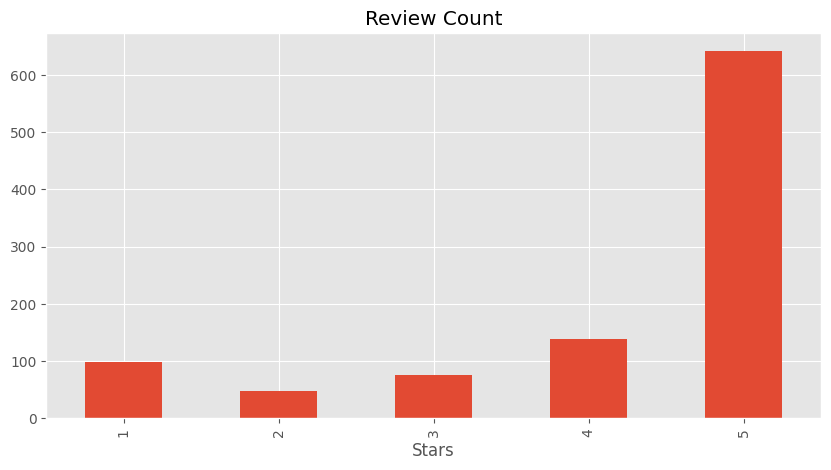

In [8]:
ax=df['Score'].value_counts().sort_index() \
    .plot(kind = 'bar',
          title="Review Count",
          figsize=(10,5))
ax.set_xlabel('Stars')
plt.show()

In [9]:
example=df["Text"][10]


**Data preprocessing**

In [10]:

#converting text into lowercase
df['Text']=df['Text'].str.lower()

In [11]:
#Removing html tags
def remove_tags(text):
    pattern= re.compile(r"<.*?>")
    data= pattern.sub('',text)
    return data

In [12]:
df['Text']=df['Text'].apply(remove_tags)

In [13]:

df['Text'][10]

"i don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  we picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  when we realized that we simply couldn't find it anywhere in our city we were bummed.now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.if you love hot sauce..i mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of tequila picante gourmet de inclan.  just realize that once you taste it, you will never want to use any other sauce.thank you for the personal, incredible service!"

In [14]:
#Removing punctuations
exclude= string.punctuation
def remove_pun(text):
    return text.translate(str.maketrans("","",exclude))

In [15]:

df['Text']=df['Text'].apply(remove_pun)

In [16]:

df['Text'][10]

'i dont know if its the cactus or the tequila or just the unique combination of ingredients but the flavour of this hot sauce makes it one of a kind  we picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away  when we realized that we simply couldnt find it anywhere in our city we were bummednow because of the magic of the internet we have a case of the sauce and are ecstatic because of itif you love hot saucei mean really love hot sauce but dont want a sauce that tastelessly burns your throat grab a bottle of tequila picante gourmet de inclan  just realize that once you taste it you will never want to use any other saucethank you for the personal incredible service'


**VADER** **Seniment** **Scoring**

In [18]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sentiment = SentimentIntensityAnalyzer()

In [20]:

sentiment.polarity_scores(example)

{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}

In [21]:
res = {}
for i, row in tqdm(df.iterrows(),total=len(df)):
    text = row['Text']
    myid= row['Id']
    res[myid]=sentiment.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [22]:

new_df = pd.DataFrame(res).T
new_df = new_df.reset_index().rename(columns={'index': 'Id'})
new_df = new_df.merge(df, how='left')

In [23]:
new_df.head()


,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...
3,4,0.000,0.925,0.075,0.4404,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price there was a wide...


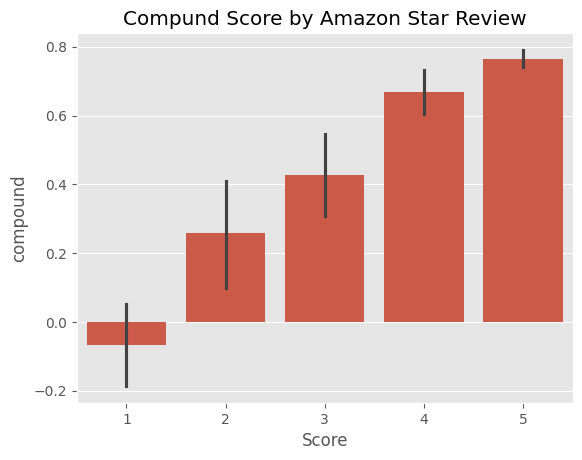

In [24]:

ax = sns.barplot(data=new_df, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

In [26]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification,pipeline

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")


In [27]:
roberta_model=pipeline("text-classification",model=model,tokenizer=tokenizer)


Device set to use cpu


In [28]:

roberta_model(example)

[{'label': 'LABEL_2', 'score': 0.9098213315010071}]

In [29]:

def run_model(text):
    roberta_model=pipeline("text-classification",model=model,tokenizer=tokenizer)
    res = roberta_model(text)
    if res[0]['label'] =='LABEL_2':
        res[0]['label']="Positive"
    elif res[0]['label'] == 'LABEL_0':
        res[0]['label']="Negative"
    elif res[0]['label'] == 'LABEL_1':
        res[0]['label']="Neutral"

    result={
        'label': res[0]['label'],
        'score': res[0]['score']
    }

    return result

In [30]:
run_model(example)


Device set to use cpu


{'label': 'Positive', 'score': 0.9098213315010071}

In [31]:
import pickle
from nltk.sentiment import SentimentIntensityAnalyzer

# Define a wrapper class
class SentimentModel:
    def __init__(self):
        self.analyzer = SentimentIntensityAnalyzer()

    def predict(self, text):
        score = self.analyzer.polarity_scores(text)
        return score['compound']

# Create the model instance
model = SentimentModel()

# Save it to a .sav file
with open('Amazon_sentiment_model.sav', 'wb') as f:
    pickle.dump(model, f)

print("Model saved to Amazon_sentiment_model.sav")


Model saved to Amazon_sentiment_model.sav
